<a href="https://colab.research.google.com/github/Divyasri-m18/health-monitor/blob/main/Health_monitor_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving UCI HAR Dataset.names to UCI HAR Dataset.names


In [2]:
import requests, zipfile, io, pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip"
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("UCI_HAR_Dataset")

print("✅ Dataset downloaded and extracted successfully!")


✅ Dataset downloaded and extracted successfully!


In [3]:
X_train = pd.read_csv("UCI_HAR_Dataset/UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
y_train = pd.read_csv("UCI_HAR_Dataset/UCI HAR Dataset/train/y_train.txt", header=None)
X_test = pd.read_csv("UCI_HAR_Dataset/UCI HAR Dataset/test/X_test.txt", delim_whitespace=True, header=None)
y_test = pd.read_csv("UCI_HAR_Dataset/UCI HAR Dataset/test/y_test.txt", header=None)

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

print("✅ Dataset loaded successfully")
print("Shape:", X.shape)
print("Sample labels:", y[0].unique())


/tmp/ipython-input-2599980892.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv("UCI_HAR_Dataset/UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
/tmp/ipython-input-2599980892.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv("UCI_HAR_Dataset/UCI HAR Dataset/test/X_test.txt", delim_whitespace=True, header=None)


✅ Dataset loaded successfully
Shape: (10299, 561)
Sample labels: [5 4 6 1 3 2]


In [4]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y_encoded = y[0].values - 1

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

y_train_cat = tf.keras.utils.to_categorical(y_train)
y_test_cat = tf.keras.utils.to_categorical(y_test)

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(y_train_cat.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train_cat, epochs=20, batch_size=64, validation_split=0.2)

loss, acc = model.evaluate(X_test, y_test_cat)
print(f"\n✅ Test Accuracy: {acc*100:.2f}%")


Epoch 1/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7242 - loss: 0.7134 - val_accuracy: 0.9417 - val_loss: 0.1680
Epoch 2/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9575 - loss: 0.1219 - val_accuracy: 0.9581 - val_loss: 0.1170
Epoch 3/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9762 - loss: 0.0832 - val_accuracy: 0.9508 - val_loss: 0.1209
Epoch 4/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9756 - loss: 0.0625 - val_accuracy: 0.9666 - val_loss: 0.0916
Epoch 5/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9828 - loss: 0.0504 - val_accuracy: 0.9703 - val_loss: 0.0783
Epoch 6/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9842 - loss: 0.0458 - val_accuracy: 0.9697 - val_loss: 0.0754
Epoch 7/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9875 - loss: 0.0367 - val_accuracy: 0.9709 - val_loss: 0.0720
Epoch 8/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9829 - loss: 0.0481 - val_accuracy: 0.

✅ UCI HAR Dataset downloaded and extracted successfully


/tmp/ipython-input-2114897890.py:21: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv("UCI_HAR_Dataset/UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
/tmp/ipython-input-2114897890.py:23: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv("UCI_HAR_Dataset/UCI HAR Dataset/test/X_test.txt", delim_whitespace=True, header=None)


Data Loaded:  (10299, 561)  samples
Epoch 1/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7020 - loss: 0.7417 - val_accuracy: 0.9481 - val_loss: 0.1480
Epoch 2/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9294 - loss: 0.1745 - val_accuracy: 0.9655 - val_loss: 0.0954
Epoch 3/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9618 - loss: 0.1061 - val_accuracy: 0.9694 - val_loss: 0.0801
Epoch 4/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9692 - loss: 0.0836 - val_accuracy: 0.9684 - val_loss: 0.0804
Epoch 5/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9737 - loss: 0.0691 - val_accuracy: 0.9743 - val_loss: 0.0645
Epoch 6/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9716 - loss: 0.0667 - val_accuracy: 0.9646 - val_loss: 0.0902
Epoch 7/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9795 - loss: 0.0520 - val_accuracy: 0.9723 - val_loss: 0.0760
Epoch 8/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.97

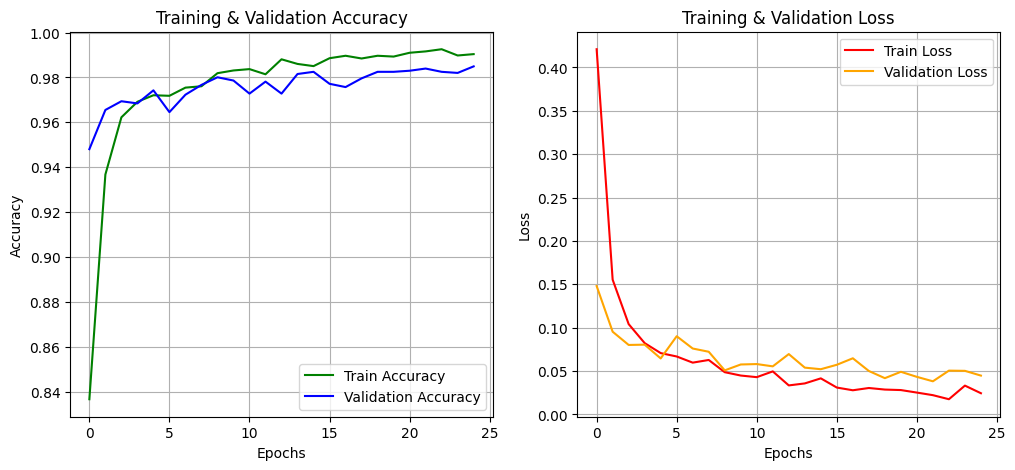

In [ ]:

import pandas as pd
import numpy as np
import requests, zipfile, io, tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip"
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("UCI_HAR_Dataset")
print("✅ UCI HAR Dataset downloaded and extracted successfully")

X_train = pd.read_csv("UCI_HAR_Dataset/UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
y_train = pd.read_csv("UCI_HAR_Dataset/UCI HAR Dataset/train/y_train.txt", header=None)
X_test = pd.read_csv("UCI_HAR_Dataset/UCI HAR Dataset/test/X_test.txt", delim_whitespace=True, header=None)
y_test = pd.read_csv("UCI_HAR_Dataset/UCI HAR Dataset/test/y_test.txt", header=None)

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])
print("Data Loaded: ", X.shape, " samples")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y = y[0].values - 1

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


y_train_cat = tf.keras.utils.to_categorical(y_train)
y_val_cat = tf.keras.utils.to_categorical(y_val)

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train_cat, epochs=25, batch_size=64, validation_data=(X_val, y_val_cat), verbose=1)

loss, acc = model.evaluate(X_val, y_val_cat, verbose=0)
print(f"\n✅ Final Test Accuracy: {acc*100:.2f}%")

y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
print("\n📊 Classification Report:")
print(classification_report(y_val, y_pred_classes,
      target_names=['Walking', 'Walking_Upstairs', 'Walking_Downstairs', 'Sitting', 'Standing', 'Lying']))

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='blue')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()
